In [0]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from IPython.display import HTML
import seaborn as sns
from tqdm import tqdm_notebook

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
data,labels = make_blobs(2000,12,16,random_state=0)

In [0]:
X_train,X_val,Y_train,Y_val = train_test_split(data,labels,stratify=labels,random_state=0)

torch Prerequisites

In [0]:
X_train,X_val,Y_train,Y_val = map(torch.tensor,(X_train,X_val,Y_train,Y_val))

In [0]:
X_train,X_val,Y_train,Y_val = X_train.float(),X_val.float(),Y_train.long(),Y_val.long()

In [0]:
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [0]:
class first_torch_network_linear_sequential_complex_dataset_gpu(nn.Module):
    
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.seq = nn.Sequential(nn.Linear(12,32),nn.Tanh(),nn.Linear(32,64),nn.Sigmoid(),nn.Linear(64,128),nn.Sigmoid()
                                 ,nn.Linear(128,16),nn.Softmax())
        
    def forward(self,X):
        return self.seq(X)

In [29]:
print(torch.cuda.device_count())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))
device = torch.device("cuda")
device

1
Tesla P100-PCIE-16GB


device(type='cuda')

In [0]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

In [0]:
def fit_optim_complex(epoch=100000,lr = 0.01):
    loss_arr = []
    acc_arr = []
    opt = optim.SGD(model.parameters(),lr = lr)

    for i in tqdm_notebook(range(epoch),unit='epoch'):
        y_hat = model(X_train)
        loss = F.cross_entropy(y_hat,Y_train)
        
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat,Y_train))
        
        loss.backward()
        opt.step()
        opt.zero_grad()


    print("loss before training",loss_arr[0])
    print("loss after training",loss_arr[-1])
    print("Accuracy",acc_arr[-1].item())
    plt.plot(loss_arr , 'red')
    plt.plot(acc_arr , 'b')
    plt.show()


In [41]:
torch.cuda.is_available()

True


loss before training 2.7725331783294678
loss after training 2.067448139190674
Accuracy 0.812666654586792


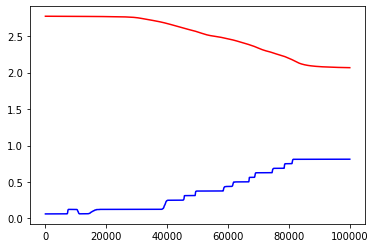

CPU times: user 2min 8s, sys: 5.56 s, total: 2min 13s
Wall time: 2min 19s


In [44]:
%%time
X_train =X_train.to(device)
Y_train=Y_train.to(device)
model = first_torch_network_linear_sequential_complex_dataset_gpu()
model.to(device)
fit_optim_complex()